# **Reporte de Datos**
---

In [2]:
# Librerias
import os
import pandas as pd
import requests
import logging
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Funcion para crear el objeto de creación de logs
def create_logger():
  logging.basicConfig(level = logging.INFO, format = '%(asctime)s - %(levenname)s - %(message)s')
  logger = logging.getLogger('Logger')
  logger.info('Logger creado')
  return logger

In [4]:
# Función de consumo a la base de datos de Firebase para cargar el DataSet
def download_firebase(url, logger):
  logger.info("Extrayendo el archivo desde Firebase")
  df = None
  try:
    df = pd.read_csv(url)
    logger.info("Archivo cargado")
  except requests.exceptions.RequestException as e:
    logger.info(f"Error al descargar el archivo CSV: {e}")
  except pd.errors.EmptyDataError:
    logger.info("El archivo CSV está vacío.")
  except Exception as e:
    logger.info(f"Ocurrió un error inesperado: {e}")
  return df

In [5]:
# Cargar DataSet
url = 'https://firebasestorage.googleapis.com/v0/b/personalwp-8822c.appspot.com/o/diabetes_prediction_dataset.csv?alt=media&token=4d70d154-c3d0-4fa0-a3aa-9b9972dd3b95'
logger = create_logger()
df = download_firebase(url, logger)

In [6]:
# Eliminación de valores atípicos y duplicados
seventy_fifth = df['bmi'].quantile(0.75)
twenty_fifth = df['bmi'].quantile(0.25)
iqr = seventy_fifth - twenty_fifth
upper = seventy_fifth + (10 * iqr)
outliers_bmi_upper = df[(df['bmi'] > upper)]
df = pd.merge(df, outliers_bmi_upper, indicator = True, how = 'outer').query('_merge == "left_only"').drop('_merge', axis = 1)
df = df.drop_duplicates(keep = "first")

## **Variables Individuales**

### **Variable 'gender'**

In [24]:
# Cantida de valores en la columna 'gender'
df['gender'].value_counts()

,count
gender,
Female,56161
Male,39964
Other,18


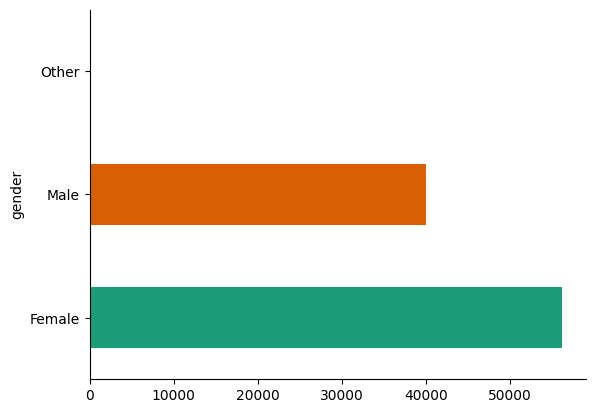

In [33]:
# Histograma de 'gender'
df.groupby('gender').size().plot(kind = 'barh', color = sns.palettes.mpl_palette('Dark2'))
plt.savefig("hist_gender.jpg")
plt.gca().spines[['top', 'right',]].set_visible(False)

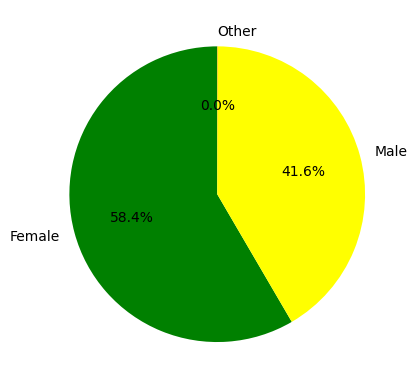

In [34]:
# Pie de 'gender'
plt.pie(df['gender'].value_counts(), labels = df['gender'].value_counts().index, autopct = '%1.1f%%', startangle = 90, colors = ['green', 'yellow','red'])
plt.savefig("pie_gender.jpg")
plt.show()

### **Variable 'age'**

In [27]:
# Cantida de valores en la columna 'age'
df['age'].value_counts()

,count
age,
80.00,4932
51.00,1566
47.00,1511
48.00,1508
53.00,1498
...,...
0.48,83
1.00,83
0.40,66


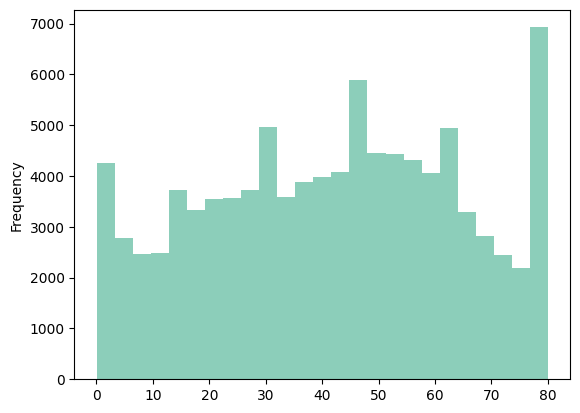

In [37]:
# Histograma de 'age'
df['age'].plot.hist(alpha = 0.5, bins = 25, color = sns.palettes.mpl_palette('Dark2'))
plt.savefig("hist_age.jpg")
plt.show()

### **Variable 'hypertension'**

In [38]:
# Cantida de valores en la columna 'hypertension'
df['hypertension'].value_counts()

,count
hypertension,
0,88682
1,7461


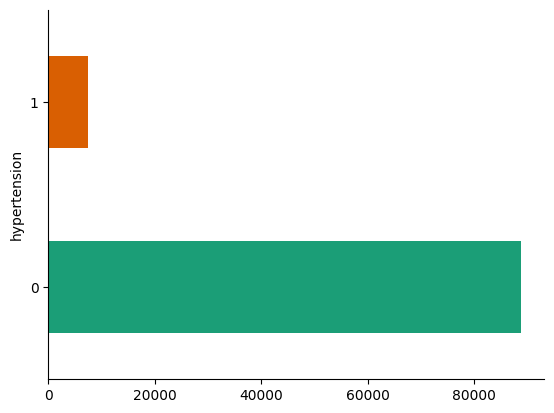

In [39]:
# Histograma de 'hypertension'
df.groupby('hypertension').size().plot(kind = 'barh', color = sns.palettes.mpl_palette('Dark2'))
plt.savefig("hist_hypertension.jpg")
plt.gca().spines[['top', 'right',]].set_visible(False)

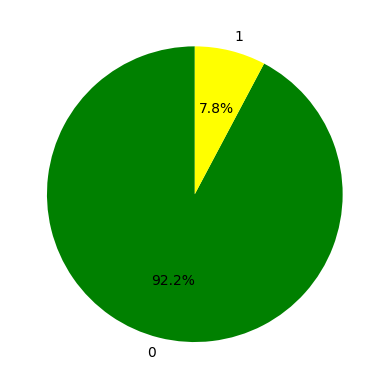

In [32]:
# Pie de 'hypertension'
plt.pie(df['hypertension'].value_counts(), labels = df['hypertension'].value_counts().index, autopct = '%1.1f%%', startangle = 90, colors = ['green', 'yellow','red'])
plt.savefig("pie_hypertension.jpg")
plt.show()

### **Variable 'heart_disease'**

In [40]:
# Cantida de valores en la columna 'heart_disease'
df['heart_disease'].value_counts()

,count
heart_disease,
0,92220
1,3923


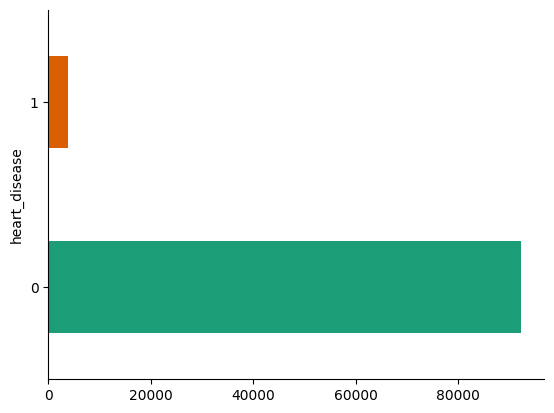

In [41]:
# Histograma de 'heart_disease'
df.groupby('heart_disease').size().plot(kind = 'barh', color = sns.palettes.mpl_palette('Dark2'))
plt.savefig("hist_heart_disease.jpg")
plt.gca().spines[['top', 'right',]].set_visible(False)

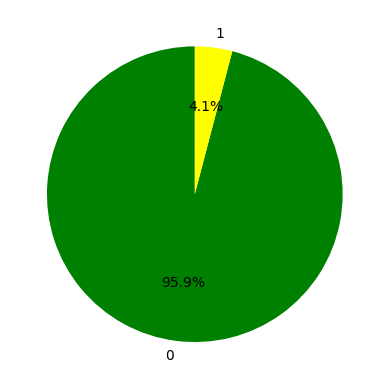

In [42]:
# Pie de 'heart_disease'
plt.pie(df['heart_disease'].value_counts(), labels = df['heart_disease'].value_counts().index, autopct = '%1.1f%%', startangle = 90, colors = ['green', 'yellow','red'])
plt.savefig("pie_heart_disease.jpg")
plt.show()

### **Variable 'smoking_history'**

In [43]:
# Cantida de valores en la columna 'smoking_history'
df['smoking_history'].value_counts()

,count
smoking_history,
never,34397
No Info,32885
former,9299
current,9197
not current,6367
ever,3998


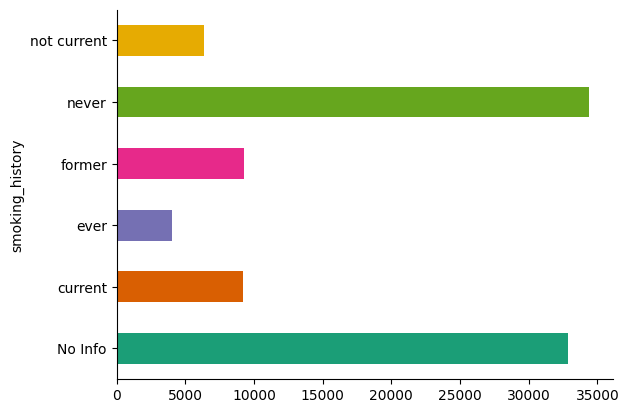

In [44]:
# Histograma de 'smoking_history'
df.groupby('smoking_history').size().plot(kind = 'barh', color = sns.palettes.mpl_palette('Dark2'))
plt.savefig("hist_smoking_history.jpg")
plt.gca().spines[['top', 'right',]].set_visible(False)

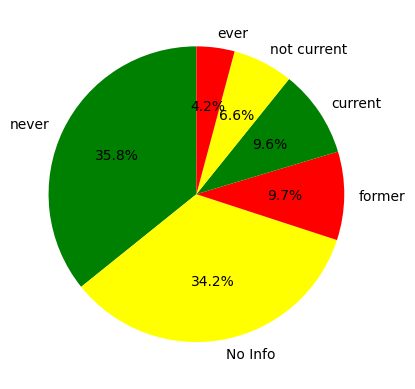

In [45]:
# Pie de 'smoking_history'
plt.pie(df['smoking_history'].value_counts(), labels = df['smoking_history'].value_counts().index, autopct = '%1.1f%%', startangle = 90, colors = ['green', 'yellow','red'])
plt.savefig("pie_smoking_history.jpg")
plt.show()

### **Variable 'bmi'**

In [46]:
# Cantida de valores en la columna 'bmi'
df['bmi'].value_counts()

,count
bmi,
27.32,21666
23.00,103
27.12,101
27.80,100
24.96,100
...,...
64.70,1
49.02,1
54.93,1


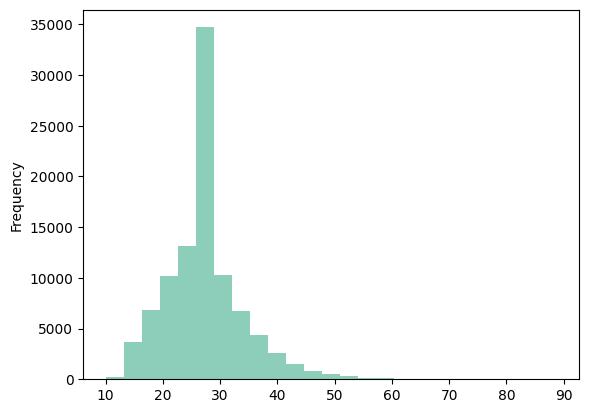

In [47]:
# Histograma de 'bmi'
df['bmi'].plot.hist(alpha = 0.5, bins = 25, color = sns.palettes.mpl_palette('Dark2'))
plt.savefig("hist_bmi.jpg")
plt.show()

### **Variable 'HbA1c_level'**

In [48]:
# Cantida de valores en la columna 'HbA1c_level'
df['HbA1c_level'].value_counts()

,count
HbA1c_level,
6.6,8164
5.7,8124
6.5,8051
5.8,7992
6.0,7987
6.2,7958
6.1,7715
3.5,7319
4.8,7296


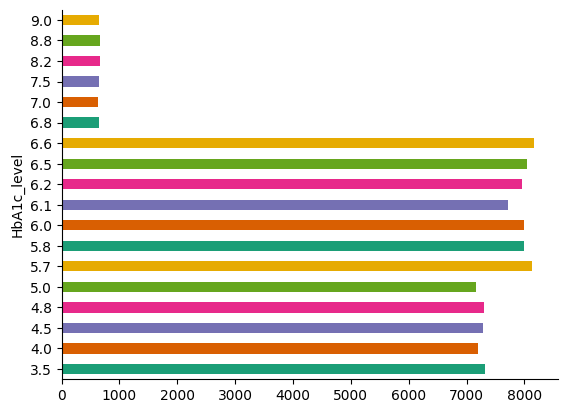

In [49]:
# Histograma de 'HbA1c_level'
df.groupby('HbA1c_level').size().plot(kind = 'barh', color = sns.palettes.mpl_palette('Dark2'))
plt.savefig("hist_HbA1c_level.jpg")
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Variable 'blood_glucose_level'**

In [51]:
# Cantida de valores en la columna 'blood_glucose_level'
df['blood_glucose_level'].value_counts()

,count
blood_glucose_level,
159,7478
130,7470
126,7421
140,7416
160,7396
145,7371
200,7290
155,7285
90,6821


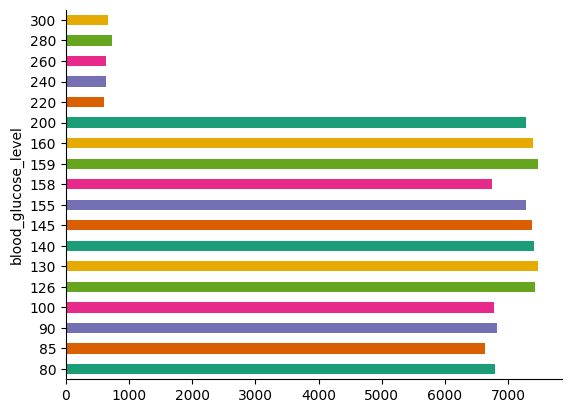

In [52]:
# Histograma de 'blood_glucose_level'
df.groupby('blood_glucose_level').size().plot(kind = 'barh', color = sns.palettes.mpl_palette('Dark2'))
plt.savefig("hist_blood_glucose_level.jpg")
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Variable 'diabetes'**

In [54]:
# Cantida de valores en la columna 'diabetes'
df['diabetes'].value_counts()

,count
diabetes,
0,87661
1,8482


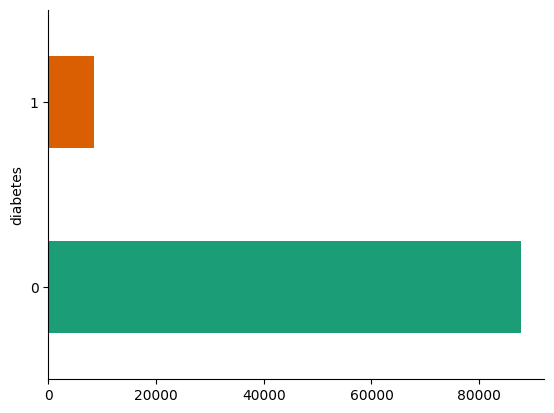

In [55]:
# Histograma de 'diabetes'
df.groupby('diabetes').size().plot(kind = 'barh', color = sns.palettes.mpl_palette('Dark2'))
plt.savefig("hist_diabetes.jpg")
plt.gca().spines[['top', 'right',]].set_visible(False)

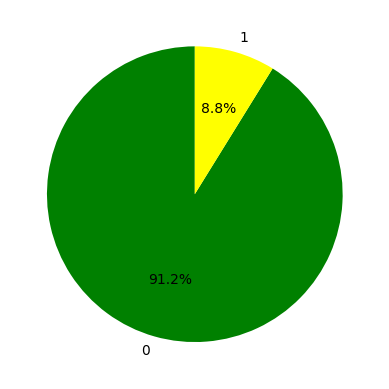

In [56]:
# Pie de 'diabetes'
plt.pie(df['diabetes'].value_counts(), labels = df['diabetes'].value_counts().index, autopct = '%1.1f%%', startangle = 90, colors = ['green', 'yellow','red'])
plt.savefig("pie_diabetes.jpg")
plt.show()